<a href="https://colab.research.google.com/github/lamorrison04/Data-Science-Project-4/blob/main/HW2_Laymoni_Morrison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *

from sklearn.linear_model import LogisticRegression # Logistic Regression Model
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline

from sklearn.compose import make_column_transformer

from sklearn import metrics
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, r2_score

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay


%matplotlib inline

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/HW2.csv")

#drop missing data
data = data.dropna()

data.head()

,Position,correct,WordList,Trial.Number,out_degree,in_degree,Length,Log_Freq_HAL,Ortho_N,Phono_N,Concreteness_Rating,Age_Of_Acquisition,Female,State
0,4,1,0,106,10.0,2.0,3.0,8.590,14.0,20.0,3.52,11.05,1,NM
1,1,0,1,37,8.0,3.0,4.0,7.920,8.0,33.0,4.14,9.12,0,CA
2,2,0,0,56,9.0,2.0,4.0,8.449,16.0,21.0,3.52,8.84,1,WA
3,1,0,0,85,11.0,14.0,4.0,10.800,9.0,1.0,1.87,8.39,1,WA
4,1,0,1,115,19.0,14.0,5.0,8.158,2.0,9.0,5.00,8.47,1,CA


In [ ]:
# dummies

dummy1 = pd.get_dummies(data["State"])
data = pd.concat([data, dummy1], axis = 1)
data = data.drop("State", axis = 1)

data.head()

,Position,correct,WordList,Trial.Number,out_degree,in_degree,Length,Log_Freq_HAL,Ortho_N,Phono_N,Concreteness_Rating,Age_Of_Acquisition,Female,CA,ID,NM,OR,WA
0,4,1,0,106,10.0,2.0,3.0,8.590,14.0,20.0,3.52,11.05,1,0,0,1,0,0
1,1,0,1,37,8.0,3.0,4.0,7.920,8.0,33.0,4.14,9.12,0,1,0,0,0,0
2,2,0,0,56,9.0,2.0,4.0,8.449,16.0,21.0,3.52,8.84,1,0,0,0,0,1
3,1,0,0,85,11.0,14.0,4.0,10.800,9.0,1.0,1.87,8.39,1,0,0,0,0,1
4,1,0,1,115,19.0,14.0,5.0,8.158,2.0,9.0,5.00,8.47,1,1,0,0,0,0


In [ ]:
#Train Test Split

predictors = ['Position', 'WordList', 'Trial.Number', 'out_degree',
       'in_degree', 'Length', 'Log_Freq_HAL', 'Ortho_N', 'Phono_N',
       'Concreteness_Rating', 'Age_Of_Acquisition', 'Female', 'CA', 'ID', 'NM',
       'OR', 'WA']
contin = ["Position", "Trial.Number", "out_degree", "in_degree", "Length", "Log_Freq_HAL", "Ortho_N", "Phono_N", "Concreteness_Rating", "Age_Of_Acquisition"]

X = data[predictors]
y = data["correct"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

z = StandardScaler()

X_train[contin] = z.fit_transform(X_train[contin])
X_test[contin] = z.transform(X_test[contin])

Best K:  1
Accuracy Score Train:  0.922675777737817
Accuracy Score Test:  0.7425386551600144


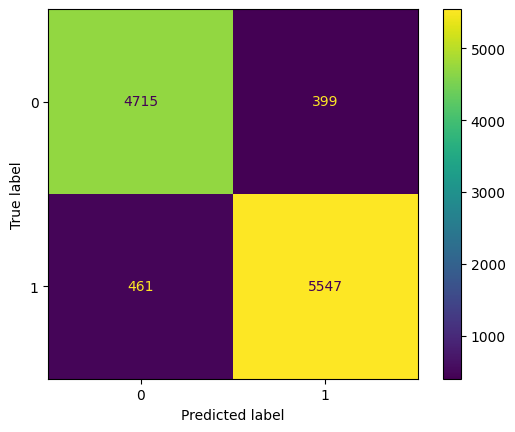

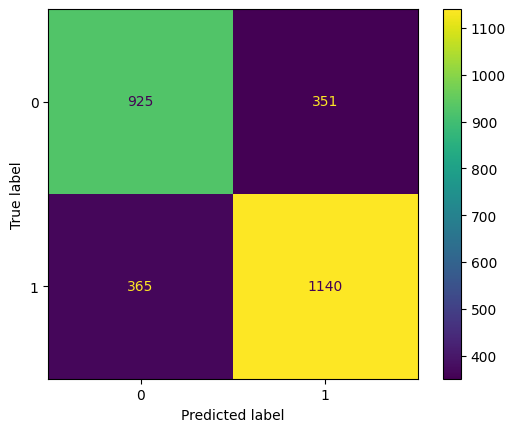

In [ ]:
#KNN Model

# create model
knn2 = KNeighborsClassifier()

# z score object
z = make_column_transformer((StandardScaler(), contin))

# make pipeline
pipe = make_pipeline(z, knn2)

# choose k
ks = {"kneighborsclassifier__n_neighbors": range(1, 10)}

# use grid search
grid = GridSearchCV(pipe, ks, scoring = "accuracy", cv = 5, refit = True)

#fit new model
knnmod = grid.fit(X_train[contin], y_train)

#get accuracy, and best k
print("Best K: ", knnmod.best_estimator_.get_params()["kneighborsclassifier__n_neighbors"])

print("Accuracy Score Train: ", accuracy_score(y_train, knnmod.predict(X_train[contin])))

y_pred_test = knnmod.predict(X_test[contin])
print("Accuracy Score Test: ",accuracy_score(y_test, y_pred_test))

# Plot matrix
ConfusionMatrixDisplay.from_predictions(y_train, knnmod.predict(X_train))
ConfusionMatrixDisplay.from_predictions(y_test, knnmod.predict(X_test))


Accuracy Score Train:  0.7522028412156087
Accuracy Score Test:  0.6774541531823085


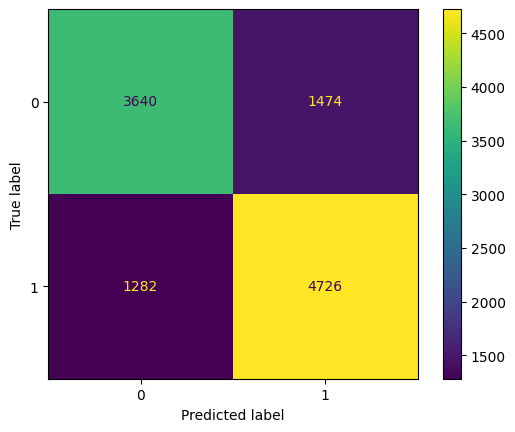

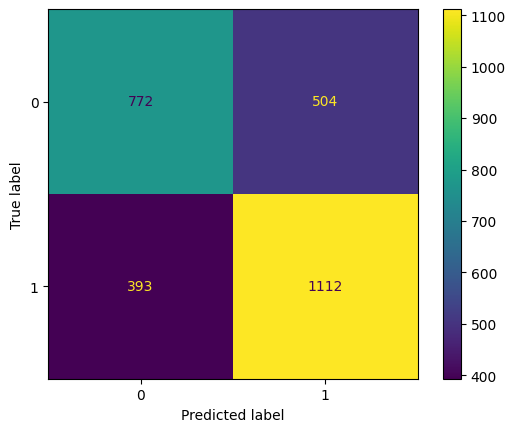

In [ ]:
# Decision Tree Model

z = make_column_transformer((StandardScaler(), predictors))
tree = DecisionTreeClassifier()

pipe = make_pipeline(z, tree)

depths = {"decisiontreeclassifier__max_depth": range(1, 10)}

grid = GridSearchCV(pipe, depths, scoring = "accuracy", cv = 5, refit = True)

DTmod = grid.fit(X_train, y_train)

print("Accuracy Score Train: ", accuracy_score(y_train, DTmod.predict(X_train)))

y_pred_test = DTmod.predict(X_test)
print("Accuracy Score Test: ", accuracy_score(y_test, y_pred_test))

# Plot matrix
ConfusionMatrixDisplay.from_predictions(y_train, DTmod.predict(X_train))
ConfusionMatrixDisplay.from_predictions(y_test, DTmod.predict(X_test))


Train Accuracy Score 0.6600431577054486
Test Accuracy Score 0.6483279395900755


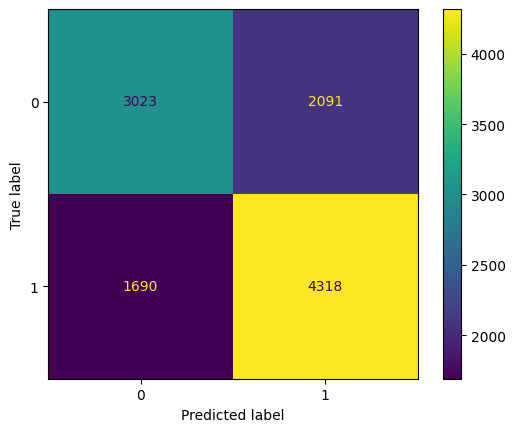

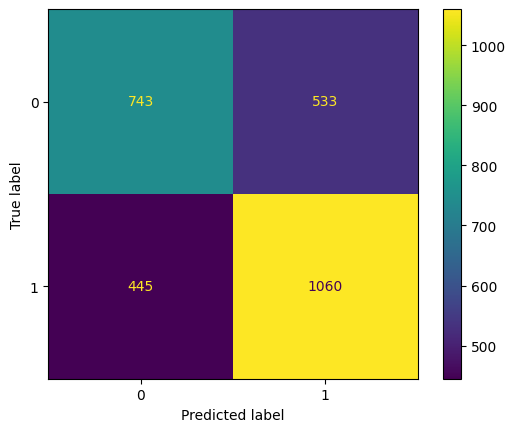

In [ ]:
#Logistic Regression model

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

accuracyTest = accuracy_score(y_test, y_pred)

accuracyTrain = accuracy_score(y_train, lr.predict(X_train))

print("Train Accuracy Score", accuracyTrain)
print("Test Accuracy Score", accuracyTest)


# Plot matrix
ConfusionMatrixDisplay.from_predictions(y_train, lr.predict(X_train))
ConfusionMatrixDisplay.from_predictions(y_test, lr.predict(X_test))



# **Question 2 Discussions**

# **A).**

KNN: Best of K = 1, Accuracy Train: 0.91934, Accuracy Test: 0.7443
Decison Tree: Accuracy Train: 0.7602, Accuracy Test: 0.686803
Logstic Regression: Accuracy Train: 0.6539, Accuracy Test: 0.666307

Based on the metrics, it seems that the KNN model performed the best overall.

The KNN model achieved the highest accuracy on the testing set (0.7443), followed by the Decision Tree model (0.686) and the Logistic Regression model (0.666307). The KNN model also had the most true positives in the confusion matrix model. However, it also had the most true negative in the confusion matrix but it was not too far off from the others.  

Overall, the KNN model appears to be the most balanced model in terms of accuracy and the confusion matrix. It also did not show signs of overfitting or underfitting, as the training and testing performance metrics were relatively similar, and the performance metrics were high. However, it is important to note that the Decision Tree and Logistic Regression models also performed relatively well but I would choose the KNN model.

# **B).**

I believe my model would be better at predicting whether or not someone recalled a word. The ability to accurately predict recall could have implications for future memory research or interventions.

Based on the performance metrics we have calculated, the KNN model seems to be the most promising model for predicting recall. It achieved high accuracy on the testing set, indicating that it was able to accurately identify most cases of correctly recalled words. Additionally, it did not show signs of overfitting or underfitting, which suggests that it could generalize well to new data.

However, it's important to keep in mind that false positives and false negatives may have different implications in this context. For example, if false positives (predicting a correct recall when it was actually incorrect) are more important to avoid than false negatives (failing to predict a correct recall when it was actually correct), then we might want to use a model that has higher precision.

Overall, in a research context, it may be worth it to further investigate the KNN model and also optimize it further to improve its performance. In a clinical context, it may be important to balance the performance of the model with the potential risks and consequences of false positives and false negatives.

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null
# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended␣texlive-plain-generic
# installing pypandoc
!pip install pypandoc
# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')
# copying your file over. Change "Class6-Completed.ipynb" to whatever your␣file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/HW2_Laymoni_Morrison.ipynb" ./
# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see␣top of notebook)
!jupyter nbconvert --to PDF "HW2_Laymoni_Morrison.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1
  libgs9 libgs9-common libharfbuzz-icu0 libidn11 libijs-0.35 libjbig2dec0
  libjs-jquery libkpathsea6 libpdfbox-java libptexenc1 libruby2.7 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern
  poppler-data preview-latex-style rake ruby ruby-minitest ruby-net-telnet
  ruby-power-assert ruby-test-unit ruby-xmlrpc ruby2.7 rubygems-integration
  t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended
  texlive-pictures texlive-plain-g